In [1]:
# Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import SGD, RMSprop, Adam, Nadam, Adadelta
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

2023-06-30 17:35:18.982954: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 17:35:19.026622: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 17:35:19.027545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 17:35:19.840594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Functions

In [2]:
def hotencode(data, columns):
    '''
    Performs the hot encode process.
    Input: data=Dataframe, columns=List of columns names.
    '''
    for key in columns:
        encode = pd.get_dummies(data[key])
        data.drop(key, axis=1, inplace=True)
        
        data = pd.concat([data, encode], axis=1)
        
    return data


# Load data

In [3]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
columns = ['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
data = pd.read_csv(link, names=columns)

print('Shape:', data.shape)

Shape: (625, 5)


In [4]:
data.head()

Class  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0     B            1              1             1               1
1     R            1              1             1               2
2     R            1              1             1               3
3     R            1              1             1               4
4     R            1              1             1               5

In [5]:
data

Class  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0       B            1              1             1               1
1       R            1              1             1               2
2       R            1              1             1               3
3       R            1              1             1               4
4       R            1              1             1               5
..    ...          ...            ...           ...             ...
620     L            5              5             5               1
621     L            5              5             5               2
622     L            5              5             5               3
623     L            5              5             5               4
624     B            5              5             5               5

[625 rows x 5 columns]

In [6]:
y = data['Class']
x = data.drop('Class', axis=1)

y.replace('L', 0, inplace=True)
y.replace('R', 1, inplace=True)
y.replace('B', 2, inplace=True)

y = np_utils.to_categorical(y)

# Model

In [7]:
# Separando dados de treino e teste.
xi,xf,yi,yf = train_test_split(x,y, test_size=0.2)

In [8]:
# Model
model = Sequential()

# Layers
dense = Dense(50, input_dim=xi.shape[1], kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(l2=0.01))
model.add(dense)

dense = Dense(50, kernel_initializer='normal', activation='relu')
model.add(dense)
# model.add(Dropout(0.2))

dense = Dense(50, kernel_initializer='normal', activation='relu')
model.add(dense)

dense = Dense(yi.shape[1], kernel_initializer='normal', activation='softmax')
model.add(dense)

# doc
# https://keras.io/api/optimizers/

# Optimizer
# optimizerValue = SGD(learning_rate=0.01,
#                      momentum=0.9,
#                      nesterov=True)

# optimizerValue = RMSprop(learning_rate=0.01,
#                      rho=0.9,
#                      momentum=0.0,)

# optimizerValue = Nadam(learning_rate=0.001,
#                       beta_1=0.9,
#                       beta_2=0.999)

# optimizerValue = Adadelta(learning_rate=0.001,
#                           rho=0.95)

optimizerValue = Adam(learning_rate=0.001,
                      beta_1=0.9,
                      beta_2=0.999,
                      amsgrad=True)
model.compile(loss='categorical_crossentropy', optimizer= optimizerValue, metrics=['acc'])

2023-06-30 17:35:22.038899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
# Fit the model
hist = model.fit(xi, yi, epochs=500, batch_size=500, validation_data=(xf,yf), verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 766ms/step - loss: 1.1018 - acc: 0.4540 - val_loss: 1.0982 - val_acc: 0.4880
Epoch 2/500
1/1 [==============================] - 0s 35ms/step - loss: 1.0987 - acc: 0.4540 - val_loss: 1.0950 - val_acc: 0.4880
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 1.0957 - acc: 0.4540 - val_loss: 1.0919 - val_acc: 0.4880
Epoch 4/500
1/1 [==============================] - 0s 33ms/step - loss: 1.0927 - acc: 0.4540 - val_loss: 1.0887 - val_acc: 0.4880
Epoch 5/500
1/1 [==============================] - 0s 32ms/step - loss: 1.0897 - acc: 0.4540 - val_loss: 1.0853 - val_acc: 0.4880
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 1.0865 - acc: 0.4540 - val_loss: 1.0818 - val_acc: 0.4880
Epoch 7/500
1/1 [==============================] - 0s 33ms/step - loss: 1.0831 - acc: 0.4540 - val_loss: 1.0781 - val_acc: 0.4880
Epoch 8/500
1/1 [==============================] - 0s 32ms/step - loss: 1.0796 - acc: 0.4

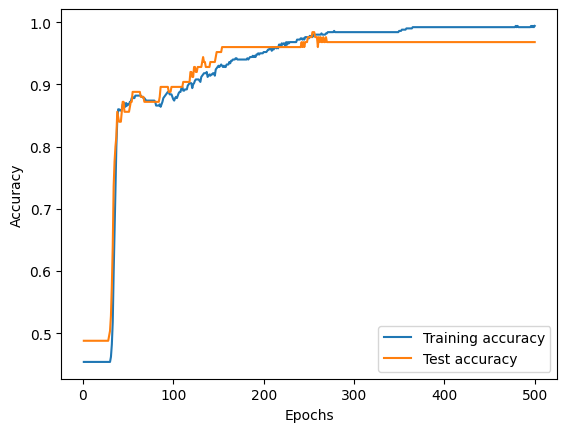

In [10]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]

# Ploting
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Test accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()